<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_2E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
#path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [4]:

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(path1)

In [6]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [7]:
df.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
10,10,file,INFO,Hardcoded HTTP url found,*,CWE-312,Cleartext Storage of Sensitive Information,1,*
39,39,webview,WARNING,Javascript enabled in Webview,binding.onlineScriptingWeb.getSettings().setJa...,CWE-939,Improper Authorization in Handler for Custom U...,1,binding.onlineScriptingWeb.getSettings().setJa...
199,199,file,WARNING,Logging found,"Log.d(TAG, String.format(""Name not found: %s"",...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, String.format(""user_str"", e.getMess..."
201,201,file,INFO,Hardcoded HTTP url found,/**,CWE-312,Cleartext Storage of Sensitive Information,1,//user_comment
269,269,file,WARNING,Logging found,"Log.d(TAG, ""Failed to parse color"", e);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, ""user_str"", e);"
...,...,...,...,...,...,...,...,...,...
3399354,3629399,webview,WARNING,Javascript enabled in Webview,radarWebView.getSettings().setJavaScriptEnable...,CWE-939,Improper Authorization in Handler for Custom U...,1,radarWebView.getSettings().setJavaScriptEnable...
3399361,3629407,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
3399386,3629436,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
3399412,3629465,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."


In [8]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [9]:
df.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
3399698,3629811,NaN,NaN,NaN,public static ArrayList<WeatherStation> fromJs...,NaN,NaN,0,public static ArrayList<WeatherStation> fromJs...
3399699,3629812,NaN,NaN,NaN,ArrayList<WeatherStation> weatherStations = ne...,NaN,NaN,0,ArrayList<WeatherStation> weatherStations = ne...
3399700,3629813,NaN,NaN,NaN,for (int i = 0; i < jsonObjects.length(); i++) {,NaN,NaN,0,for (int i = 0; i < jsonObjects.length(); i++) {
3399701,3629814,NaN,NaN,NaN,weatherStations.add(new WeatherStation(jsonObj...,NaN,NaN,0,weatherStations.add(new WeatherStation(jsonObj...
3399702,3629815,NaN,NaN,NaN,return weatherStations;,NaN,NaN,0,return weatherStations;


In [10]:
df.shape

(3399703, 9)

In [11]:
df.describe()

,index,Vulnerability_status
count,3.399703e+06,3.399703e+06
mean,1.756112e+06,8.602222e-03
std,1.029752e+06,9.234840e-02
min,0.000000e+00,0.000000e+00
25%,8.778785e+05,0.000000e+00
50%,1.734096e+06,0.000000e+00
75%,2.607758e+06,0.000000e+00
max,3.629815e+06,1.000000e+00


In [12]:
df.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [13]:
df.nunique()

,0
index,3399703
category,5
Severity,3
Description,27
Code,3375088
CWE_ID,14
CWE_Desc,14
Vulnerability_status,2
processed_code,3373084


In [14]:
df['Vulnerability_status'].unique()

array([0, 1])

In [15]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    3370458
1      29245
Name: count, dtype: int64


In [16]:
df_safe = df[df['Vulnerability_status']==0]

In [17]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [18]:
df_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [19]:
df_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
3399698,3629811,NaN,NaN,NaN,public static ArrayList<WeatherStation> fromJs...,NaN,NaN,0,public static ArrayList<WeatherStation> fromJs...
3399699,3629812,NaN,NaN,NaN,ArrayList<WeatherStation> weatherStations = ne...,NaN,NaN,0,ArrayList<WeatherStation> weatherStations = ne...
3399700,3629813,NaN,NaN,NaN,for (int i = 0; i < jsonObjects.length(); i++) {,NaN,NaN,0,for (int i = 0; i < jsonObjects.length(); i++) {
3399701,3629814,NaN,NaN,NaN,weatherStations.add(new WeatherStation(jsonObj...,NaN,NaN,0,weatherStations.add(new WeatherStation(jsonObj...
3399702,3629815,NaN,NaN,NaN,return weatherStations;,NaN,NaN,0,return weatherStations;


In [20]:
df_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
10,10,file,INFO,Hardcoded HTTP url found,*,CWE-312,Cleartext Storage of Sensitive Information,1,*
39,39,webview,WARNING,Javascript enabled in Webview,binding.onlineScriptingWeb.getSettings().setJa...,CWE-939,Improper Authorization in Handler for Custom U...,1,binding.onlineScriptingWeb.getSettings().setJa...
199,199,file,WARNING,Logging found,"Log.d(TAG, String.format(""Name not found: %s"",...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, String.format(""user_str"", e.getMess..."
201,201,file,INFO,Hardcoded HTTP url found,/**,CWE-312,Cleartext Storage of Sensitive Information,1,//user_comment
269,269,file,WARNING,Logging found,"Log.d(TAG, ""Failed to parse color"", e);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, ""user_str"", e);"


In [21]:
df_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
3399354,3629399,webview,WARNING,Javascript enabled in Webview,radarWebView.getSettings().setJavaScriptEnable...,CWE-939,Improper Authorization in Handler for Custom U...,1,radarWebView.getSettings().setJavaScriptEnable...
3399361,3629407,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
3399386,3629436,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
3399412,3629465,webview,WARNING,BaseURL set for Webview,"radarWebView.loadDataWithBaseURL(null, display...",CWE-939,Improper Authorization in Handler for Custom U...,1,"radarWebView.loadDataWithBaseURL(null, display..."
3399684,3629792,file,WARNING,Logging found,"Log.d(""nl.implode.weer"", object.getString(""nam...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(""user_str"", object.getString(""user_str""));"


In [22]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [23]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [24]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [25]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [26]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    29245
0    29245
Name: count, dtype: int64


In [27]:
print(df_balanced.value_counts())

index    category  Severity  Description                    Code                                                                                                                          CWE_ID   CWE_Desc                                                 Vulnerability_status  processed_code                                                                                              
3629792  file      WARNING   Logging found                  Log.d("nl.implode.weer", object.getString("name"));                                                                           CWE-532  Insertion of Sensitive Information into Log File         1                     Log.d("user_str", object.getString("user_str"));                                                                1
10       file      INFO      Hardcoded HTTP url found       *                                                                                                                             CWE-312  Cleartext Storage of Sensitive Inf

<Axes: >

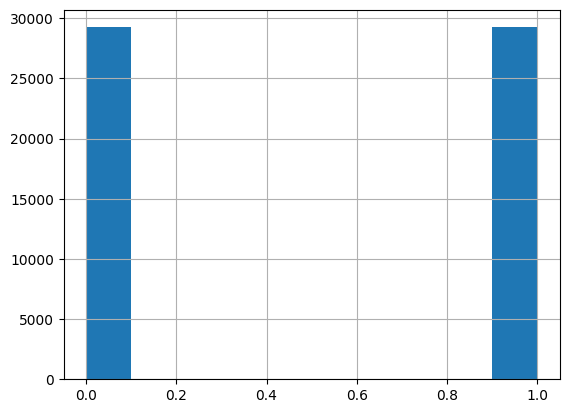

In [28]:
df_balanced['Vulnerability_status'].hist()

In [29]:
df_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,944691,broadcast,VULNERABILITY,Dynamic broadcast receiver found,LocalBroadcastManager.getInstance((Context)App...,CWE-925,Improper Verification of Intent by Broadcast R...,1,LocalBroadcastManager.getInstance((Context)App...
1,3142305,NaN,NaN,NaN,private int eotOffset = 0;,NaN,NaN,0,private int eotOffset = 0;
2,13408,file,WARNING,Logging found,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +..."
3,3086680,file,WARNING,Logging found,"Log.d(TAG, mPlayer + "" playback state changed:...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, mPlayer + ""user_str"" + state.getSta..."
4,3101150,NaN,NaN,NaN,filter.getQuery().saveInIntent(appIntent);,NaN,NaN,0,filter.getQuery().saveInIntent(appIntent);


In [30]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [31]:
df_balanced.head(10)

,index,category,Vulnerability_status,processed_code
0,944691,broadcast,1,LocalBroadcastManager.getInstance((Context)App...
1,3142305,NaN,0,private int eotOffset = 0;
2,13408,file,1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +..."
3,3086680,file,1,"Log.d(TAG, mPlayer + ""user_str"" + state.getSta..."
4,3101150,NaN,0,filter.getQuery().saveInIntent(appIntent);
5,1714515,file,1,"Log.v(""user_str"", ""user_str"", var7);"
6,2056217,NaN,0,this.field_2850 = var2;
7,551190,file,1,private static final String YOUTH_CHILDREN_URL...
8,50241,file,1,"Log.w(LOGTAG, ""user_str"" + e.getMessage());"
9,108564,NaN,0,try (InputStream in = new FileInputStream(file...


In [32]:
df_balanced.tail(10)

,index,category,Vulnerability_status,processed_code
58480,2945271,NaN,0,SerializationManager.getInstance().toJson(chan...
58481,2335085,NaN,0,boolean var4 = var1.contains(var3);
58482,1784138,NaN,0,if (s instanceof d0) {
58483,1596000,file,1,"Log.w(""user_str"", ""Tag value for tag: \n""user_..."
58484,3267481,file,1,"Log.e(TAG, ""user_str"" + mIconPack.getPackPacka..."
58485,3493120,NaN,0,for (int speed: speedList) {
58486,794245,file,1,final Presence presence = (Presence)packet;
58487,2736863,file,1,"Log.d(LOG_TAG, ""user_str"" + names[id2] + ""user..."
58488,2703547,NaN,0,altarmenische Sprache;Grabar;klassisches Armen...
58489,3607141,NaN,0,cifpseg.legs = new CIFPLeg[nlegs];


In [33]:
df_balanced.dropna()

,index,category,Vulnerability_status,processed_code
0,944691,broadcast,1,LocalBroadcastManager.getInstance((Context)App...
2,13408,file,1,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +..."
3,3086680,file,1,"Log.d(TAG, mPlayer + ""user_str"" + state.getSta..."
5,1714515,file,1,"Log.v(""user_str"", ""user_str"", var7);"
7,551190,file,1,private static final String YOUTH_CHILDREN_URL...
...,...,...,...,...
58478,2347324,webview,1,final WebView webView = (WebView) findViewById...
58483,1596000,file,1,"Log.w(""user_str"", ""Tag value for tag: \n""user_..."
58484,3267481,file,1,"Log.e(TAG, ""user_str"" + mIconPack.getPackPacka..."
58486,794245,file,1,final Presence presence = (Presence)packet;


In [34]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [35]:
df_balanced.head()

,processed_code,Vulnerability_status
0,LocalBroadcastManager.getInstance((Context)App...,1
1,private int eotOffset = 0;,0
2,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +...",1
3,"Log.d(TAG, mPlayer + ""user_str"" + state.getSta...",1
4,filter.getQuery().saveInIntent(appIntent);,0


In [36]:
df_balanced.columns = ['text', 'labels']

In [37]:
df_balanced.head(5)

,text,labels
0,LocalBroadcastManager.getInstance((Context)App...,1
1,private int eotOffset = 0;,0
2,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +...",1
3,"Log.d(TAG, mPlayer + ""user_str"" + state.getSta...",1
4,filter.getQuery().saveInIntent(appIntent);,0


In [38]:
df_balanced.head(5)

,text,labels
0,LocalBroadcastManager.getInstance((Context)App...,1
1,private int eotOffset = 0;,0
2,"Log.i(Global.LOG_CONTEXT, mDebugPrefix + why +...",1
3,"Log.d(TAG, mPlayer + ""user_str"" + state.getSta...",1
4,filter.getQuery().saveInIntent(appIntent);,0


In [39]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [40]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [41]:
from datasets import load_dataset

In [42]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [43]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 58490
    })
})

In [44]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 46792
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 11698
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/46792 [00:00<?, ? examples/s]

Map:   0%|          | 0/11698 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [56]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-56-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [57]:
trainer.train()

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.163100,0.164710,0.953411,0.952679
2,0.137200,0.148874,0.959138,0.958693
3,0.090600,0.167184,0.961361,0.961242


TrainOutput(global_step=8775, training_loss=0.1425338808152071, metrics={'train_runtime': 3122.3733, 'train_samples_per_second': 44.958, 'train_steps_per_second': 2.81, 'total_flos': 3.693447750721536e+16, 'train_loss': 0.1425338808152071, 'epoch': 3.0})